In [5]:
#Import Libraries
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
from tqdm import tqdm
from tensorflow.keras.layers import Dense, Flatten ,Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob 
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')
#shallon neural network (نوع المودل)
#CNN model

In [6]:

#Create Files_Name
image_data = '/kaggle/input/animals10/raw-img'

pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,cavallo
1,pecora
2,elefante
3,gatto
4,scoiattolo
5,gallina
6,ragno
7,mucca
8,cane
9,farfalla


In [7]:
import glob
import os
import numpy as np
import pandas as pd  # Corrected the import statement

image_data = '/kaggle/input/animals10/raw-img'
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)ا
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = list(zip(files, labels))
# Create a DataFrame using the data
dataframe = pd.DataFrame(data, columns=["Image", "Label"])
# Display the first few rows of the DataFrame
print(dataframe)

                                                   Image       Label
0      /kaggle/input/animals10/raw-img/cane/OIP-0ERf2...        cane
1      /kaggle/input/animals10/raw-img/ragno/OIP-SZBf...       ragno
2      /kaggle/input/animals10/raw-img/ragno/OIP-Zy5o...       ragno
3      /kaggle/input/animals10/raw-img/elefante/OIP-2...    elefante
4      /kaggle/input/animals10/raw-img/pecora/OIP-Bey...      pecora
...                                                  ...         ...
26174  /kaggle/input/animals10/raw-img/cane/OIP-zLa3j...        cane
26175  /kaggle/input/animals10/raw-img/gallina/OIP-j4...     gallina
26176  /kaggle/input/animals10/raw-img/scoiattolo/OIP...  scoiattolo
26177  /kaggle/input/animals10/raw-img/farfalla/OIP-v...    farfalla
26178  /kaggle/input/animals10/raw-img/cane/OIP-x4zOV...        cane

[26179 rows x 2 columns]


# Visualization

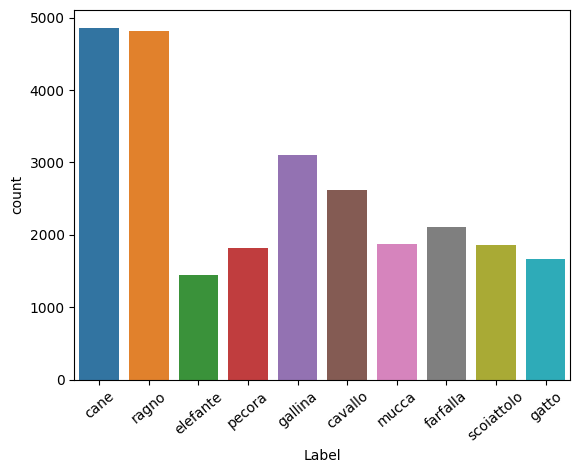

In [8]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 40);

# Split Train and Test Dataset

In [9]:
train_data_dir =image_data
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)


Found 26179 files belonging to 10 classes.
Using 20944 files for training.
Found 26179 files belonging to 10 classes.
Using 5235 files for validation.


# class_names = train.class_names
class_names

In [12]:
class_names = train.class_names
class_names

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

# MobileNetV3Small Model

In [13]:
weights_path = '/kaggle/input/weights-mobilenet-v3-small-224-1-0-float-no-top-v2/weights_mobilenet_v3_small_224_1.0_float_no_top_v2.h5'
base_model = tf.keras.applications.MobileNetV3Small(input_shape=(224, 224, 3), include_top=False, weights=weights_path)
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten()) 
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(10,activation=tf.nn.softmax))
keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Function  (None, 7, 7, 576)         939120    
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dropout (Dropout)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 10)                282250    
                                                                 
Total params: 1221370 (4.66 MB)
Trainable params: 282250 (1.08 MB)
Non-trainable params: 939120 (3.58 MB)
_________________________________________________________________


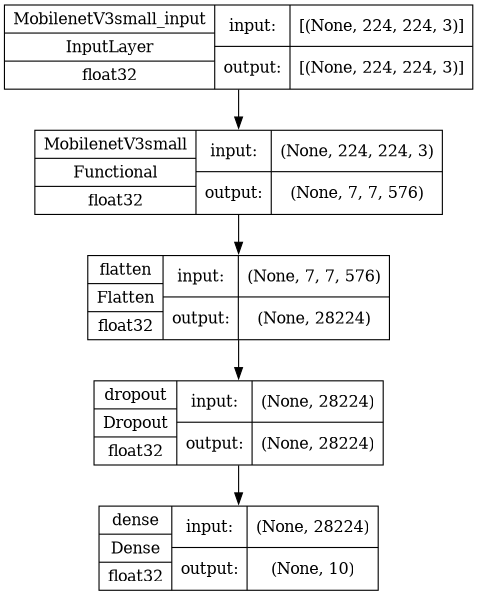

In [14]:
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=80)

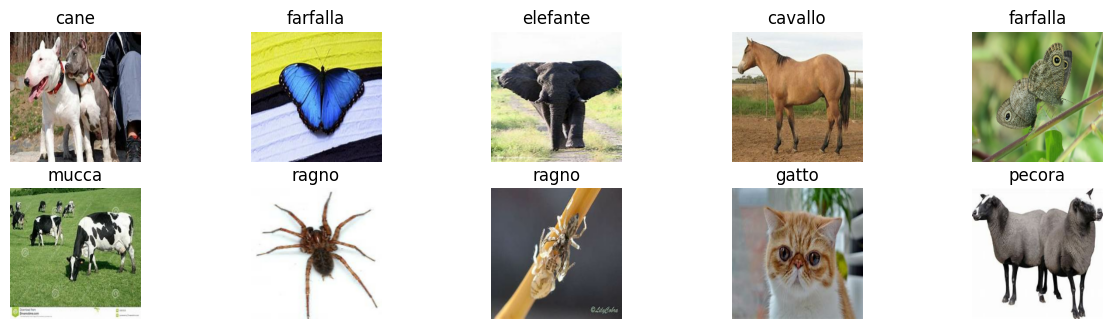

In [15]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(10):
        ax = plt.subplot(10, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [16]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [17]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [19]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit_generator(train,epochs=20,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/20
655/655 [==============================] - 62s 78ms/step - loss: 1.6777 - accuracy: 0.8599 - val_loss: 0.7478 - val_accuracy: 0.9444
Epoch 2/20
655/655 [==============================] - 24s 36ms/step - loss: 0.8967 - accuracy: 0.9352 - val_loss: 0.6527 - val_accuracy: 0.9576
Epoch 3/20
655/655 [==============================] - 24s 36ms/step - loss: 0.6700 - accuracy: 0.9544 - val_loss: 0.5015 - val_accuracy: 0.9729
Epoch 4/20
655/655 [==============================] - 24s 36ms/step - loss: 0.5695 - accuracy: 0.9636 - val_loss: 0.6526 - val_accuracy: 0.9689
Epoch 5/20
655/655 [==============================] - 24s 36ms/step - loss: 0.5120 - accuracy: 0.9685 - val_loss: 0.6457 - val_accuracy: 0.9736
Epoch 6/20
655/655 [==============================] - 25s 37ms/step - loss: 0.5211 - accuracy: 0.9714 - val_loss: 0.5878 - val_accuracy: 0.9805
Epoch 7/20
655/655 [==============================] - 24s 36ms/step - loss: 0.4714 - accuracy: 0.9747 - val_loss: 0.5531 - val_accuracy:

In [20]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

164/164 [==============================] - 5s 31ms/step - loss: 0.5015 - accuracy: 0.9729
Test Loss = 0.5015196204185486
Test Accuracy = 0.9728748798370361


In [21]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,1.677727,0.859864,0.747801,0.944413
1,0.896662,0.935208,0.652681,0.957593
2,0.670047,0.954450,0.501520,0.972875
3,0.569537,0.963617,0.652594,0.968863
4,0.512018,0.968487,0.645667,0.973639
5,0.521103,0.971352,0.587848,0.980516
6,0.471402,0.974742,0.553082,0.982426
7,0.433728,0.976509,0.617018,0.983190


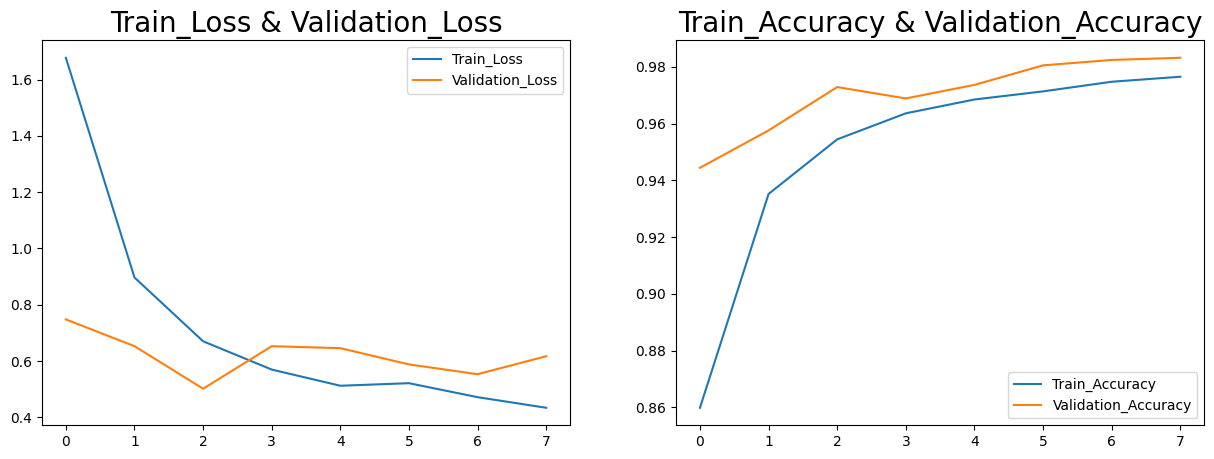

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [23]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=keras_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

164/164 [==============================] - 4s 19ms/step


,Actual,Prediction
0,2,2
1,5,5
2,7,7
3,1,1
4,8,8
...,...,...
5230,7,7
5231,2,2
5232,3,3
5233,6,6


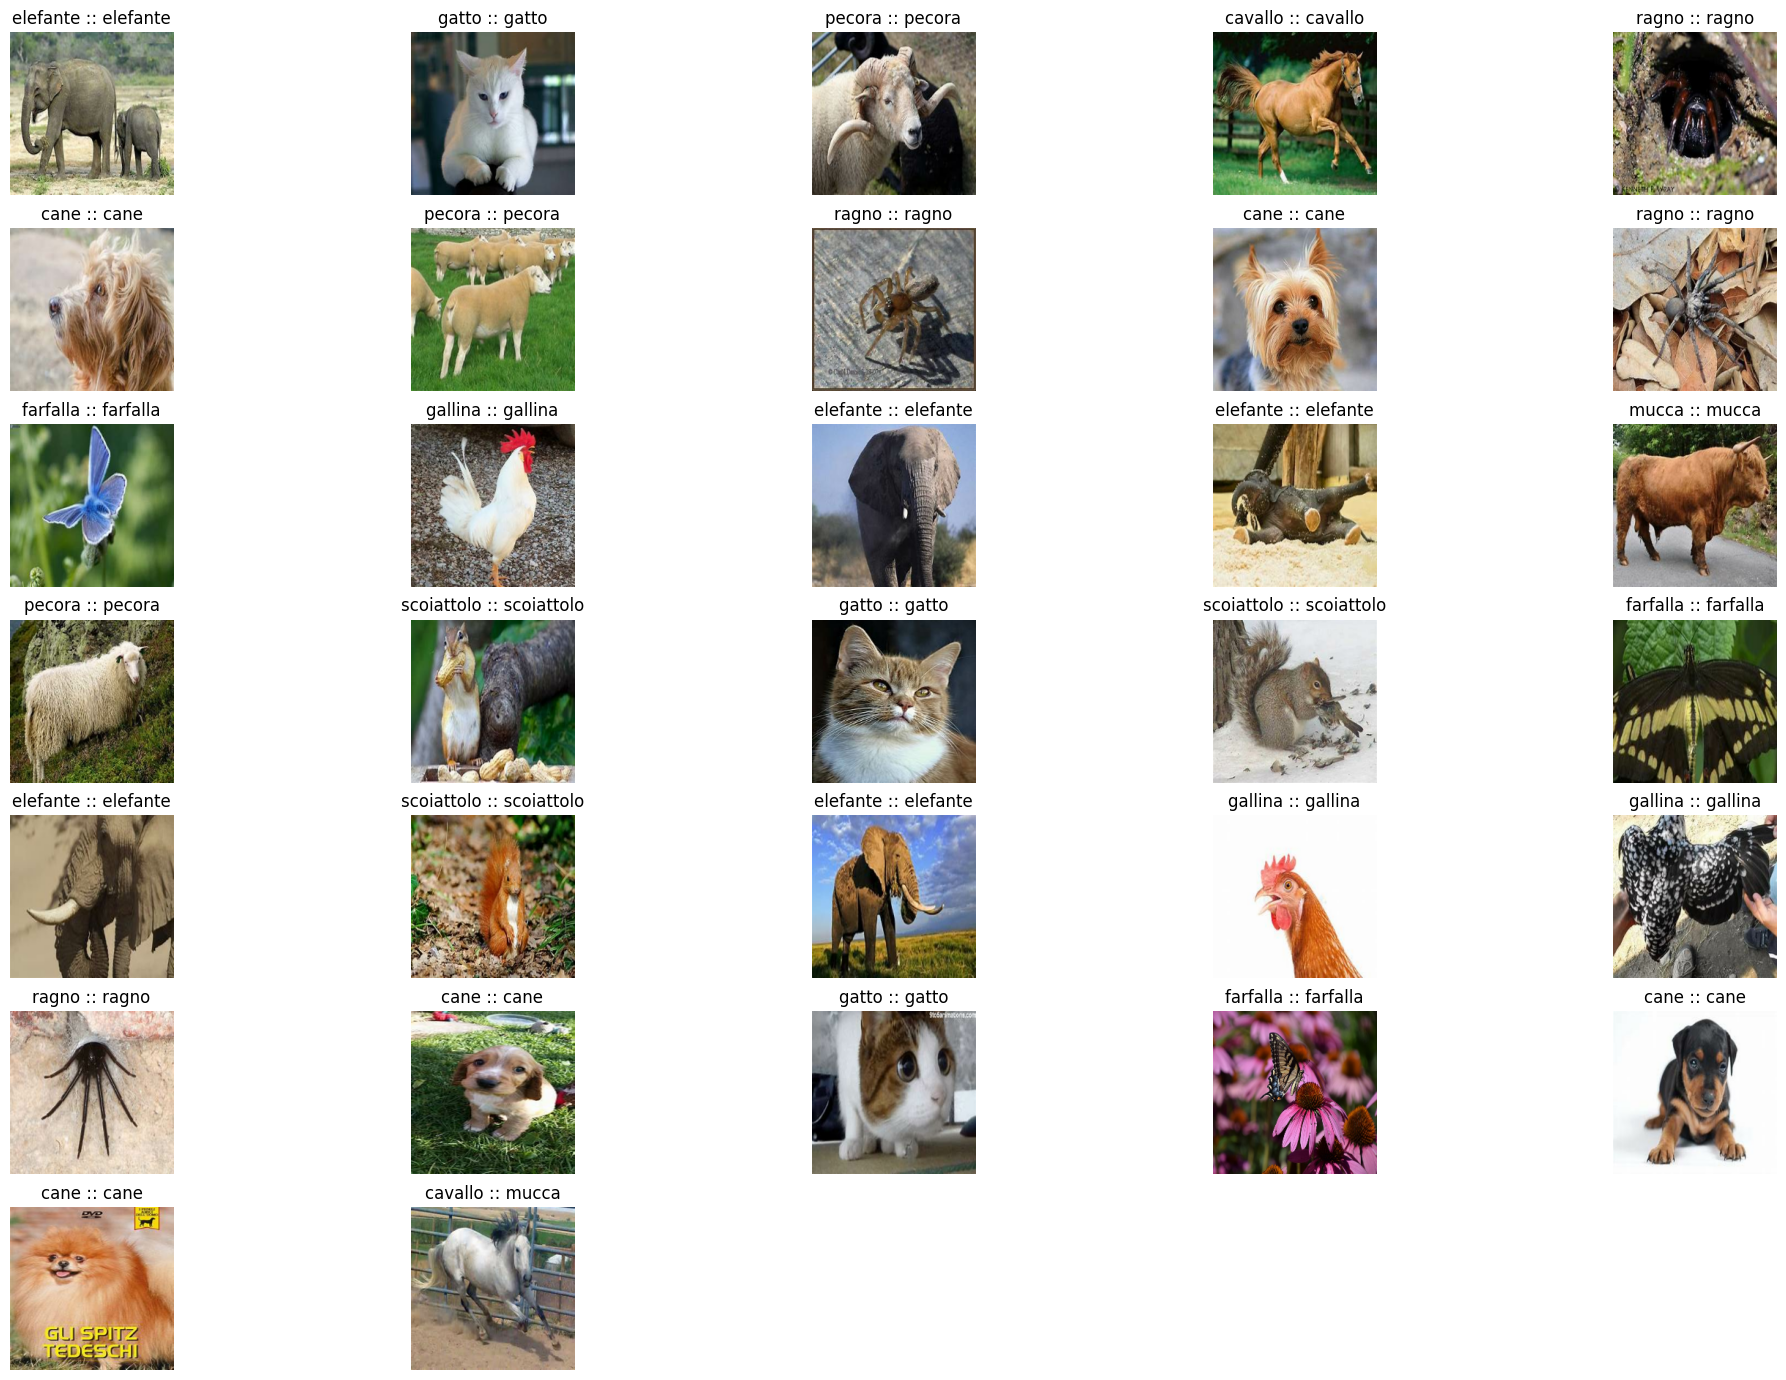

In [24]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(10,5, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

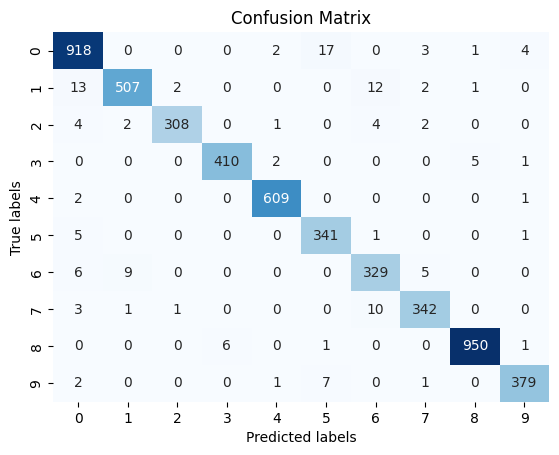

array([[918,   0,   0,   0,   2,  17,   0,   3,   1,   4],
       [ 13, 507,   2,   0,   0,   0,  12,   2,   1,   0],
       [  4,   2, 308,   0,   1,   0,   4,   2,   0,   0],
       [  0,   0,   0, 410,   2,   0,   0,   0,   5,   1],
       [  2,   0,   0,   0, 609,   0,   0,   0,   0,   1],
       [  5,   0,   0,   0,   0, 341,   1,   0,   0,   1],
       [  6,   9,   0,   0,   0,   0, 329,   5,   0,   0],
       [  3,   1,   1,   0,   0,   0,  10, 342,   0,   0],
       [  0,   0,   0,   6,   0,   1,   0,   0, 950,   1],
       [  2,   0,   0,   0,   1,   7,   0,   1,   0, 379]])

In [25]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='Blues')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
plt.show()
CM

In [26]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.3f}%".format(Acc * 100))

accuracy is: 97.287%
